In [1]:
import keras
keras.__version__
import matplotlib.pyplot as plt
from pylab import *
plt.rc('font',family='Times New Roman')#全局改成Times New Roman
import os

#data_dir = 'D:\TAO2018\data'
fname = os.path.join( 'Forecasting results.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:5701]

print(header)
print(len(lines))

import numpy as np


float_data_qian = np.zeros((len(lines), len(header)))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[0:]]
    float_data_qian[i, :] = values

D:\TAO2018\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['TRUE', 'GRU', 'LSTM', 'DTR', 'GBR', 'SVR', 'ANN']
5700


In [2]:
true = float_data_qian[:, 0]  
gru = float_data_qian[:, 1]  
lstm = float_data_qian[:, 2] 
dtr = float_data_qian[:, 3]  
gbr = float_data_qian[:, 4]  
svr = float_data_qian[:, 5]
ann = float_data_qian[:, 6]

# MAPE&SMAPE计算

In [3]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(actual, predicted):
    a = np.abs(np.array(actual) - np.array(predicted))
    b = np.array(actual) + np.array(predicted)
    
    return 2 * np.mean(np.divide(a, b, out=np.zeros_like(a), where=b!=0, casting='unsafe'))

print('GRU_MAPE:', mean_absolute_percentage_error(true, gru))
print('LSTM_MAPE:', mean_absolute_percentage_error(true, lstm))
print('ANN_MAPE:', mean_absolute_percentage_error(true, ann))
print('SVR_MAPE:', mean_absolute_percentage_error(true, svr))
print('DTR_MAPE:', mean_absolute_percentage_error(true, dtr))
print('GBR_MAPE:', mean_absolute_percentage_error(true, gbr))

print('GRU_SMAPE:', smape(true, gru))
print('LSTM_SMAPE:', smape(true, lstm))
print('ANN_SMAPE:', smape(true, ann))
print('SVR_SMAPE:', smape(true, svr))
print('DTR_SMAPE:', smape(true, dtr))
print('GBR_SMAPE:', smape(true, gbr))




GRU_MAPE: 21.835559019409317
LSTM_MAPE: 20.57497644338869
ANN_MAPE: 26.07379602449867
SVR_MAPE: 39.46700068004506
DTR_MAPE: 36.660122786925406
GBR_MAPE: 39.241172044584594
GRU_SMAPE: 0.18513207633461945
LSTM_SMAPE: 0.1617405694702772
ANN_SMAPE: 0.20293875460500416
SVR_SMAPE: 0.2637837522286599
DTR_SMAPE: 0.2574311295769102
GBR_SMAPE: 0.2635392364357186


# MSE RMSE MAE计算

In [4]:
def errors(y_true, y_pred): 
    target = y_true
    prediction = y_pred

    error = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])

    #print("Errors: ", error)
    #print(error)

    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)#target-prediction之差平方 
        absError.append(abs(val))#误差绝对值

    #print("Square Error: ", squaredError)
    #print("Absolute Value of Error: ", absError)

    print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE


    from math import sqrt
    print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
    print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

In [5]:
print('gru:')
errors(true, gru)
print('lstm:')
errors(true, lstm)
print('ann:')
errors(true, ann)
print('svr:')
errors(true, svr)
print('dtr:')
errors(true, dtr)
print('gbr:')
errors(true, gbr)

gru:
MSE =  169.3394362827501
RMSE =  13.013048692860183
MAE =  8.730637131298245
lstm:
MSE =  175.6718252015062
RMSE =  13.25412483725373
MAE =  8.66559071270544
ann:
MSE =  228.97449166631955
RMSE =  15.13190310788169
MAE =  10.504372786816315
svr:
MSE =  767.6450725101654
RMSE =  27.706408509768373
MAE =  16.760815493619823
dtr:
MSE =  832.4813596491229
RMSE =  28.85275306879957
MAE =  17.161140350877194
gbr:
MSE =  768.628350761975
RMSE =  27.724147430750236
MAE =  17.003092034383158


In [6]:
# 函数：计算相关系数
def calc_corr(a, b):
    a_avg = sum(a)/len(a)
    b_avg = sum(b)/len(b) 
    # 计算分子，协方差————按照协方差公式，本来要除以n的，由于在相关系数中上下同时约去了n，于是可以不除以n
    cov_ab = sum([(x - a_avg)*(y - b_avg) for x,y in zip(a, b)])
    # 计算分母，方差乘积————方差本来也要除以n，在相关系数中上下同时约去了n，于是可以不除以n
    sq = math.sqrt(sum([(x - a_avg)**2 for x in a])*sum([(x - b_avg)**2 for x in b])) 
    corr_factor = cov_ab/sq
    #return corr_factor
    print(corr_factor)

In [9]:
print('lstm:')
calc_corr(true, lstm)
print('gru:')
calc_corr(true, gru)

print('ann:')
calc_corr(true, ann)
print('gbr:')
calc_corr(true, gbr)
print('dtr:')
calc_corr(true, dtr)
print('svr:')
calc_corr(true, svr)

lstm:
0.9880503101853092
gru:
0.9895765444568712
ann:
0.9844791097462274
gbr:
0.9419504343189767
dtr:
0.9374968541822873
svr:
0.9425437962726664


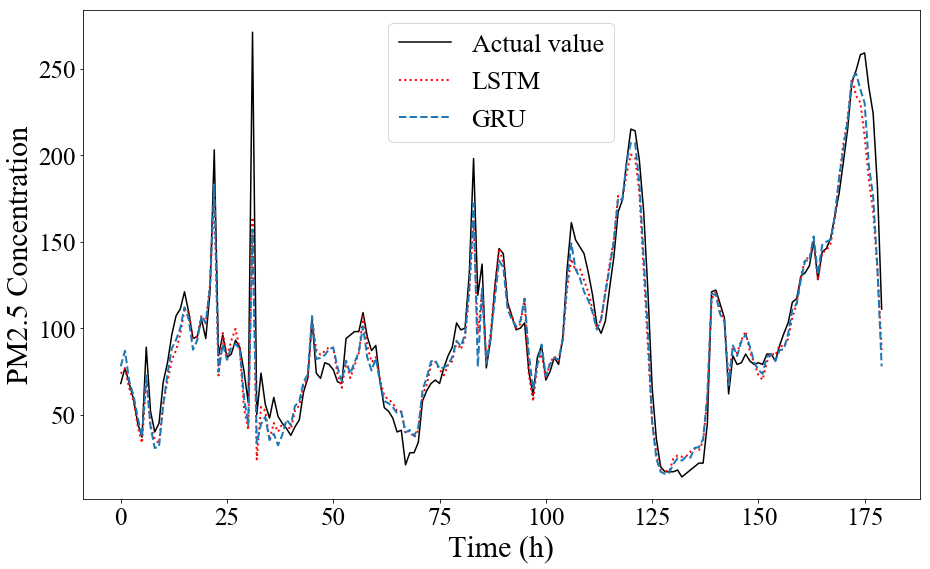

In [10]:
plt.figure(figsize=(15,9))
plt.plot(true[200:380],'k-',  label='Actual value')#黑色实线
plt.plot(lstm[200:380],'r:',  label='LSTM', linewidth = 2)#红色点线
plt.plot(gru[200:380], '--',label='GRU', linewidth = 2)
#plt.plot(dtr[200:380], '--',label='DT', linewidth = 2)
#plt.plot(svr[200:380], '--',label='SVR', linewidth = 2)

#调整坐标轴刻度的大小
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#plt.title('Actual value and predicted value',fontsize=20)
plt.xlabel('Time (h)',fontsize=30)
plt.ylabel('PM2.5 Concentration',fontsize=30)
#plt.legend()

# 设置图例字体大小
plt.legend(fontsize=26)
plt.show()

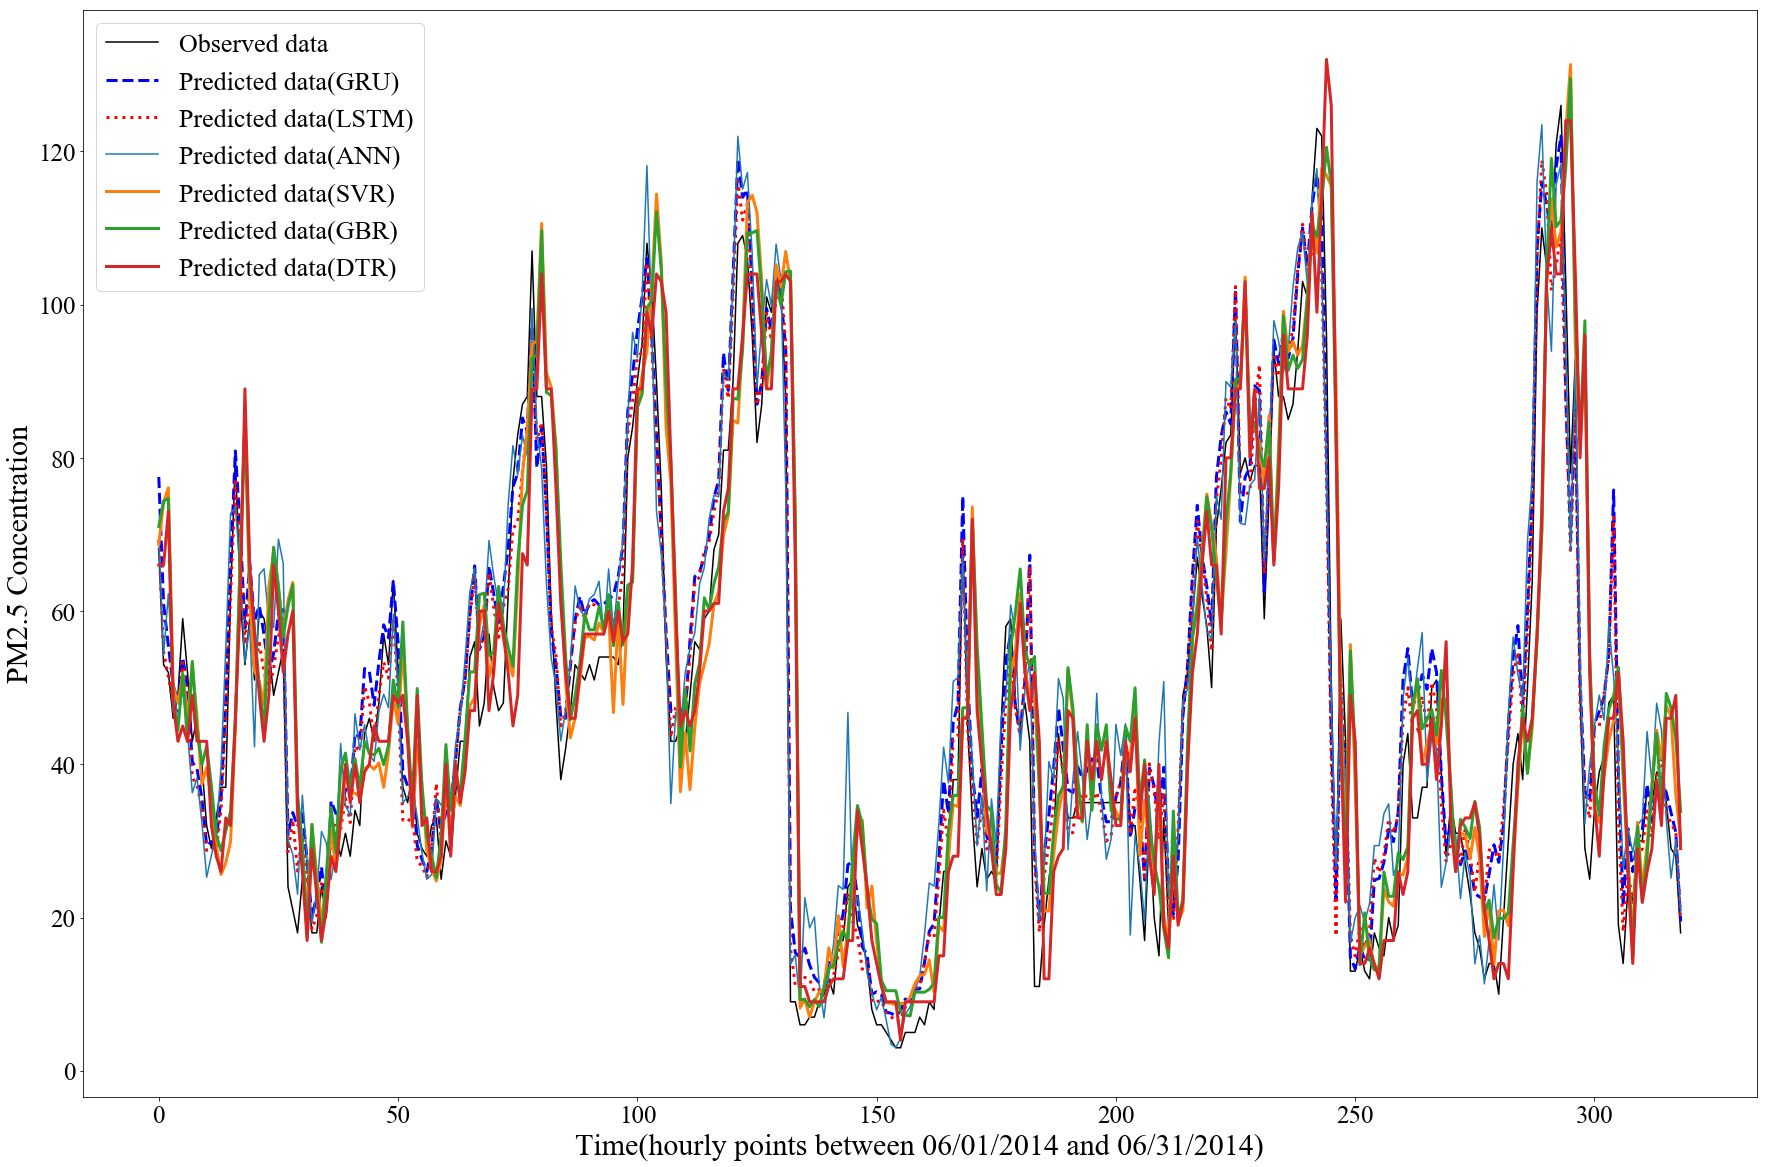

In [12]:

plt.figure(figsize=(30,20))
plt.plot(true[607:926],'k-',  label='Observed data')#黑色实线
plt.plot(gru[607:926], 'b--',label='Predicted data(GRU)', linewidth = 3)
plt.plot(lstm[607:926],'r:',  label='Predicted data(LSTM)', linewidth = 3)#红色点线
plt.plot(ann[607:926],  label='Predicted data(ANN)')#黑色实线
plt.plot(svr[607:926], label='Predicted data(SVR)', linewidth = 3)
plt.plot(gbr[607:926],  label='Predicted data(GBR)', linewidth = 3)#红色点线
plt.plot(dtr[607:926],  label='Predicted data(DTR)', linewidth = 3)#红色点线
#调整坐标轴刻度的大小
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#plt.title('Actual value and predicted value',fontsize=20)
plt.xlabel('Time(hourly points between 06/01/2014 and 06/31/2014)',fontsize=30)
plt.ylabel('PM2.5 Concentration',fontsize=30)
#plt.legend()

# 设置图例字体大小
plt.legend(fontsize=26)
plt.show()

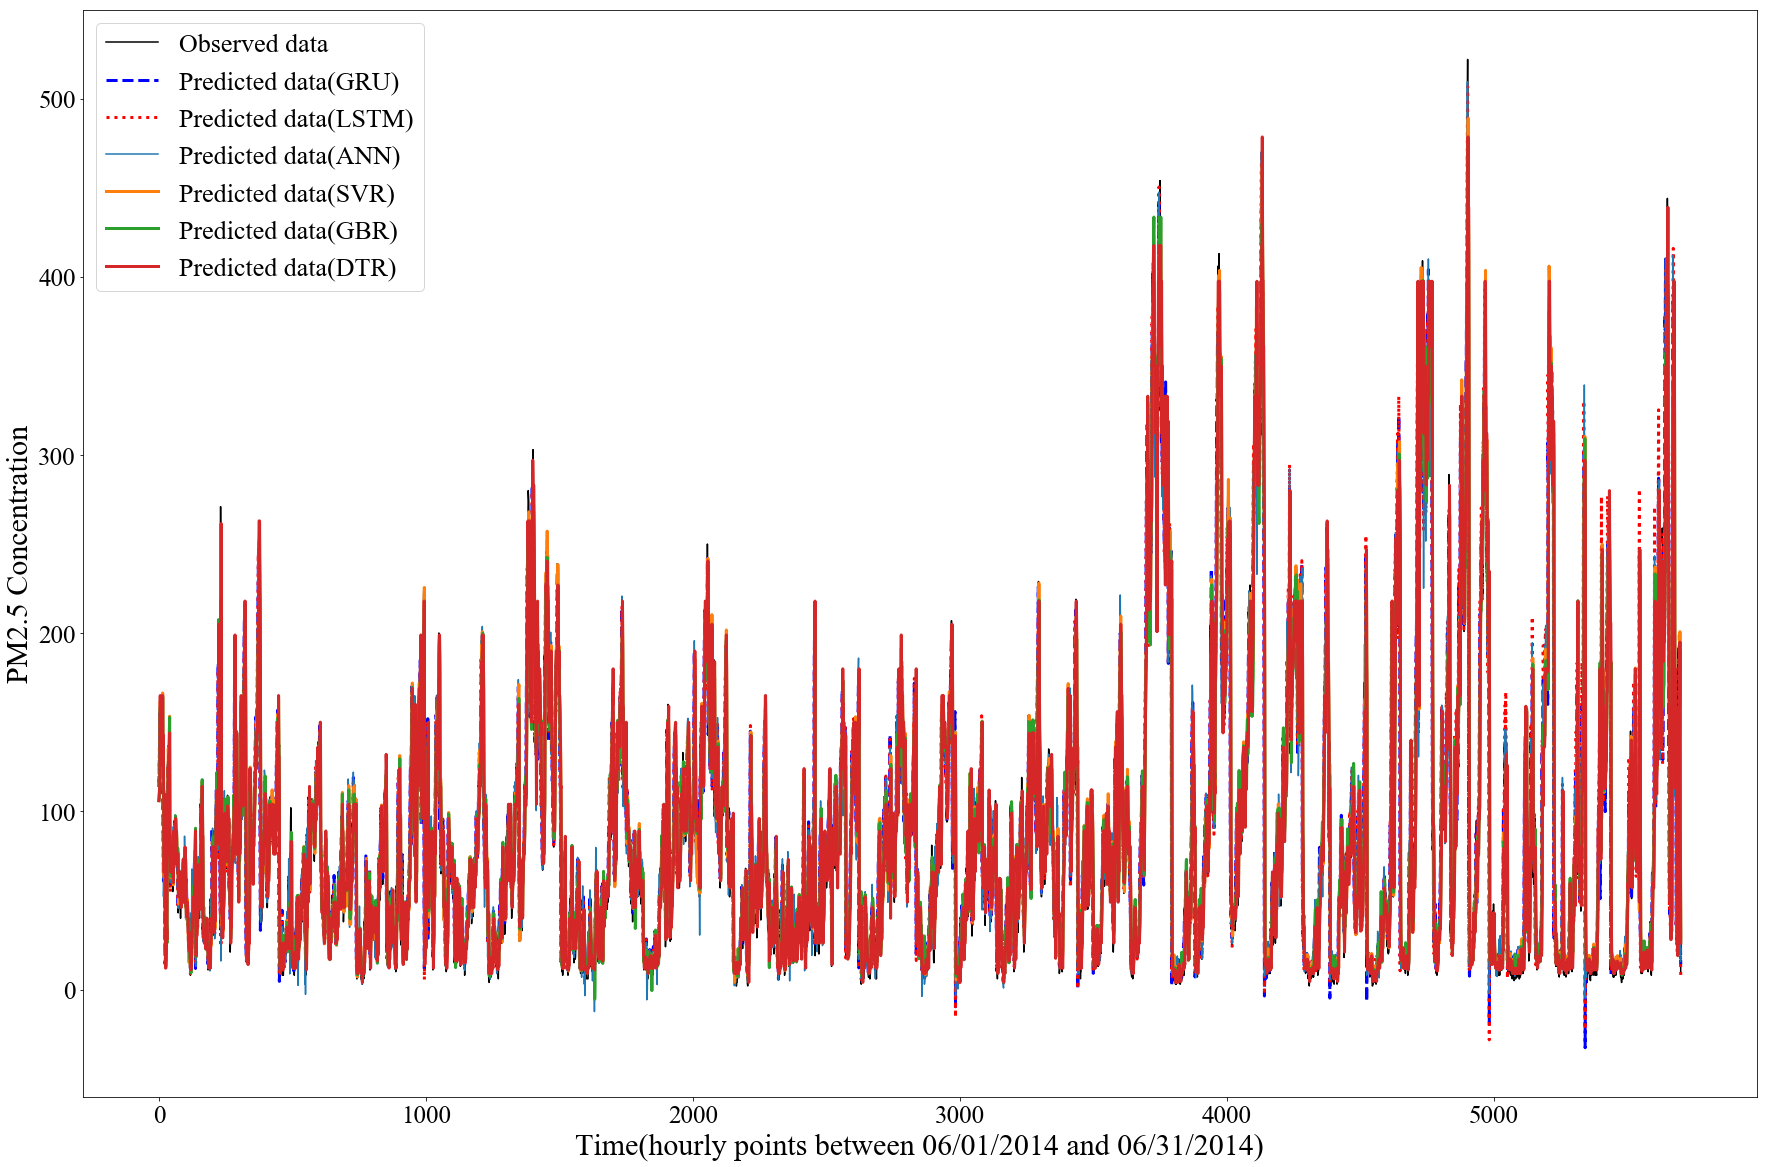

In [13]:
plt.figure(figsize=(30,20))
plt.plot(true,'k-',  label='Observed data')#黑色实线
plt.plot(gru, 'b--',label='Predicted data(GRU)', linewidth = 3)
plt.plot(lstm,'r:',  label='Predicted data(LSTM)', linewidth = 3)#红色点线
plt.plot(ann,  label='Predicted data(ANN)')#黑色实线
plt.plot(svr, label='Predicted data(SVR)', linewidth = 3)
plt.plot(gbr,  label='Predicted data(GBR)', linewidth = 3)#红色点线
plt.plot(dtr,  label='Predicted data(DTR)', linewidth = 3)#红色点线
#调整坐标轴刻度的大小
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#plt.title('Actual value and predicted value',fontsize=20)
plt.xlabel('Time(hourly points between 06/01/2014 and 06/31/2014)',fontsize=30)
plt.ylabel('PM2.5 Concentration',fontsize=30)
#plt.legend()

# 设置图例字体大小
plt.legend(fontsize=26)
plt.show()

# 画scatter plot

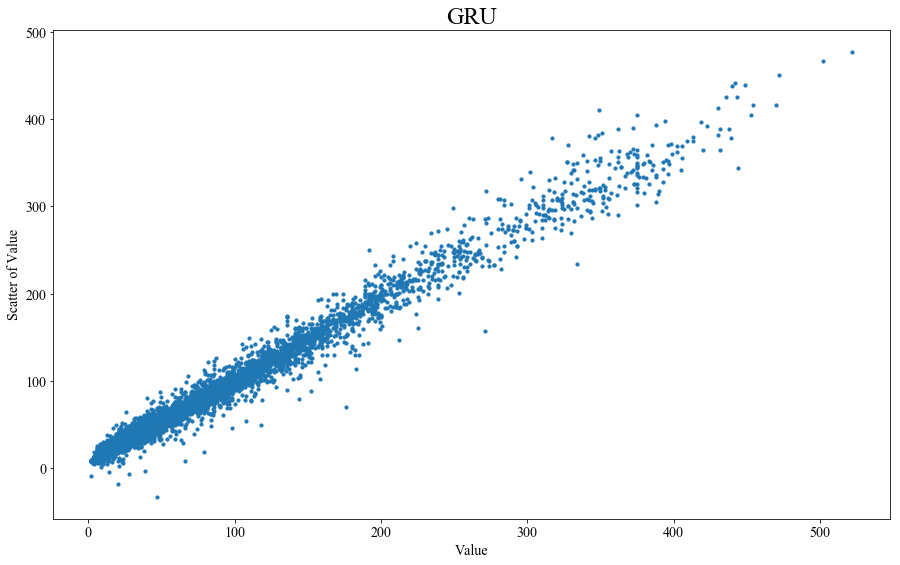

In [15]:

import matplotlib.pyplot as plt

#x_values=[1,2,3,4,5]
#y_values=[1,4,9,16,25]


# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))
plt.scatter(true,gru,s=10)
true
# 设置图表标题并给坐标轴加上标签
plt.title("GRU",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Scatter of Value",fontsize=14)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=14)

plt.show()


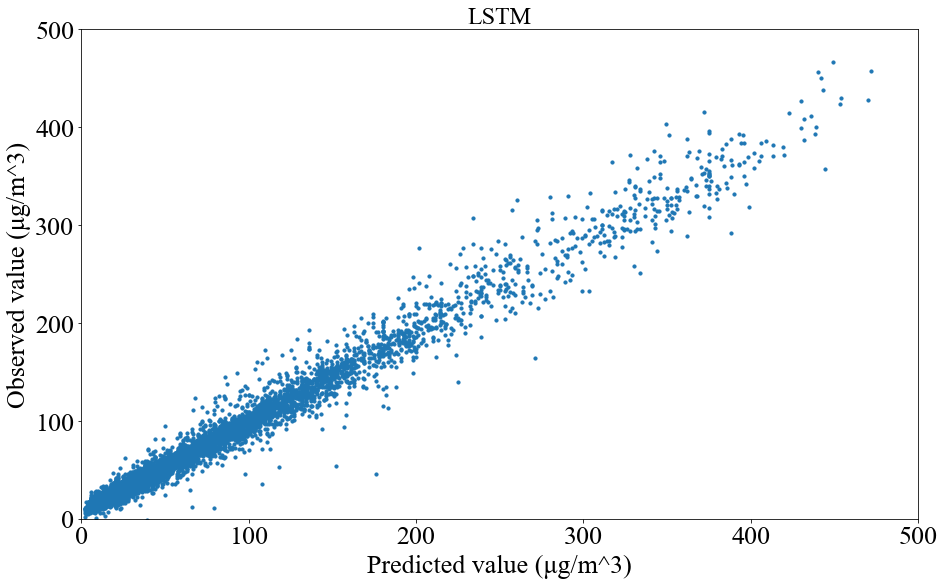

In [17]:
import matplotlib.pyplot as plt

# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))

plt.xlim(xmax=500,xmin=0)
plt.ylim(ymax=500,ymin=0)

plt.scatter(true,lstm,s=10)
#ttt
# 设置图表标题并给坐标轴加上标签
plt.title("LSTM",fontsize=24)
plt.xlabel("Predicted value (μg/m^3)",fontsize=26)
plt.ylabel("Observed value (μg/m^3)",fontsize=26)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=26)

plt.show()

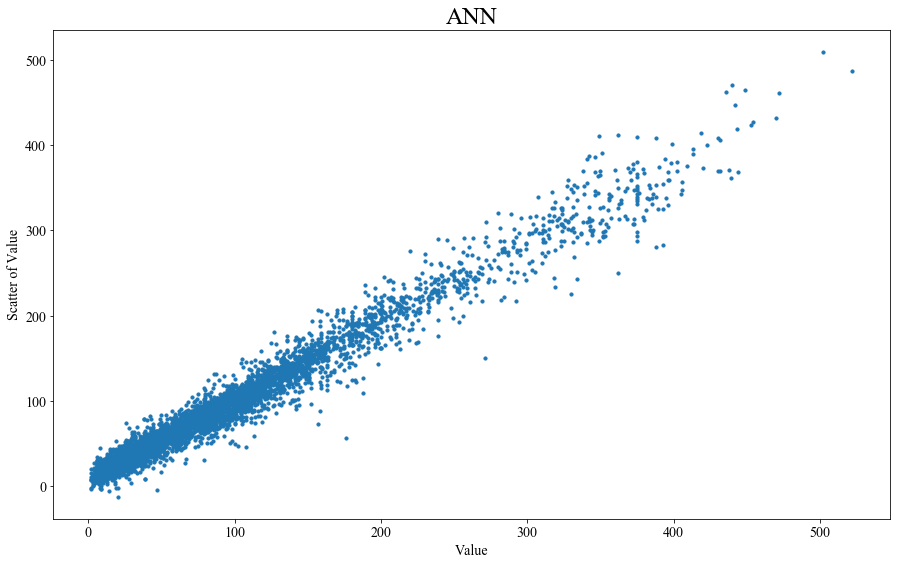

In [18]:

import matplotlib.pyplot as plt

#x_values=[1,2,3,4,5]
#y_values=[1,4,9,16,25]


# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))
plt.scatter(true,ann,s=10)
true
# 设置图表标题并给坐标轴加上标签
plt.title("ANN",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Scatter of Value",fontsize=14)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=14)

plt.show()


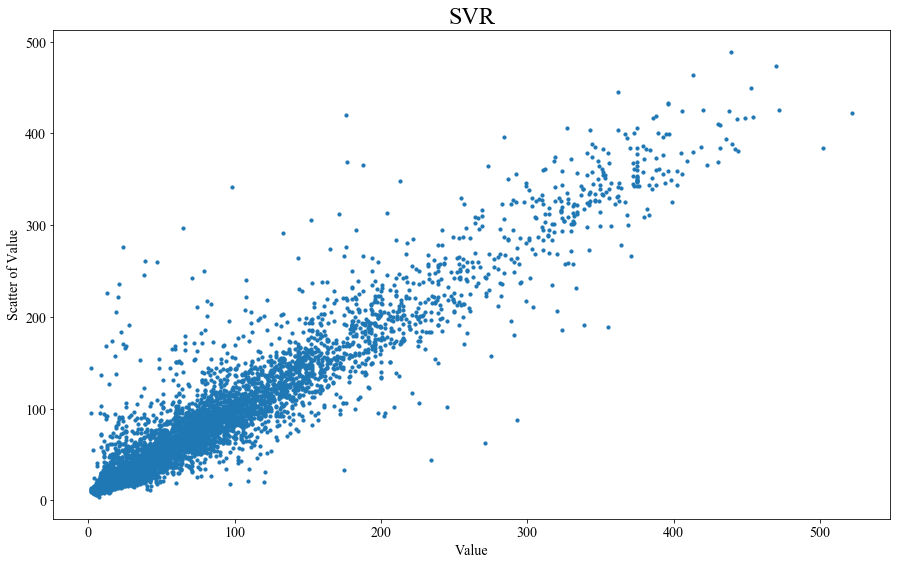

In [19]:
import matplotlib.pyplot as plt

#x_values=[1,2,3,4,5]
#y_values=[1,4,9,16,25]


# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))
plt.scatter(true,svr,s=10)
true
# 设置图表标题并给坐标轴加上标签
plt.title("SVR",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Scatter of Value",fontsize=14)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=14)

plt.show()

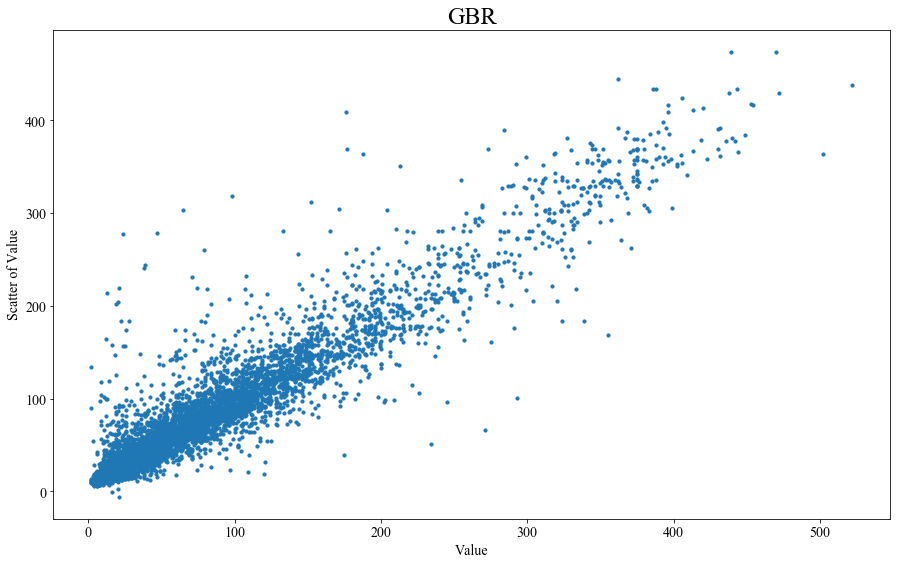

In [20]:
import matplotlib.pyplot as plt

#x_values=[1,2,3,4,5]
#y_values=[1,4,9,16,25]


# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))
plt.scatter(true,gbr,s=10)
true
# 设置图表标题并给坐标轴加上标签
plt.title("GBR",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Scatter of Value",fontsize=14)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=14)

plt.show()

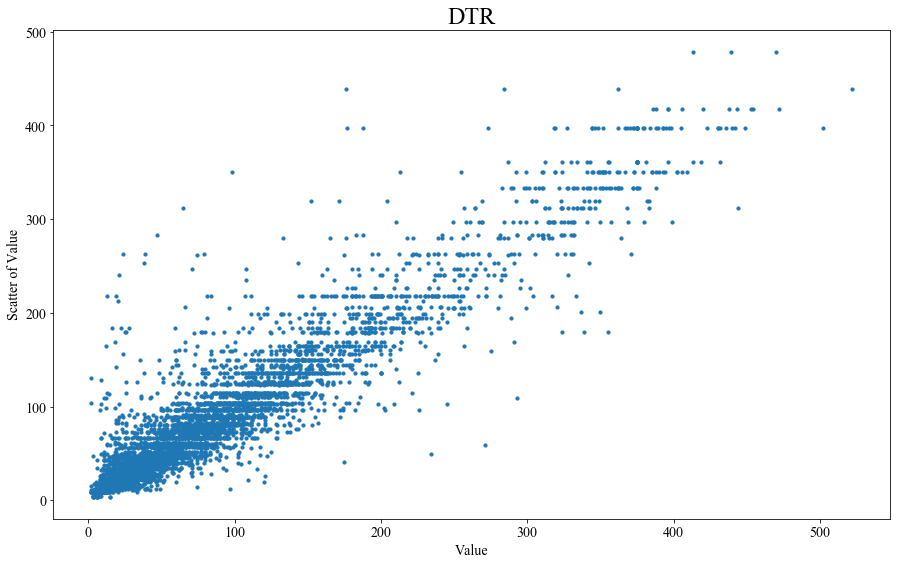

In [21]:
import matplotlib.pyplot as plt

#x_values=[1,2,3,4,5]
#y_values=[1,4,9,16,25]


# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))
plt.scatter(true,dtr,s=10)
true
# 设置图表标题并给坐标轴加上标签
plt.title("DTR",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Scatter of Value",fontsize=14)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=14)

plt.show()

# 画箱线图

In [22]:
lstm_n = lstm-true
gru_n = gru-true
ann_n = ann-true
svr_n = svr-true
dtr_n = dtr-true
gbr_n = gbr-true

errordata = np.zeros((5700, 6))
 
errordata[:,0] = gru_n 
errordata[:,1] = lstm_n 
errordata[:,2] = ann_n
errordata[:,3] = svr_n 
errordata[:,4] = dtr_n 
errordata[:,5] = gbr_n  

errordata.shape

(5700, 6)

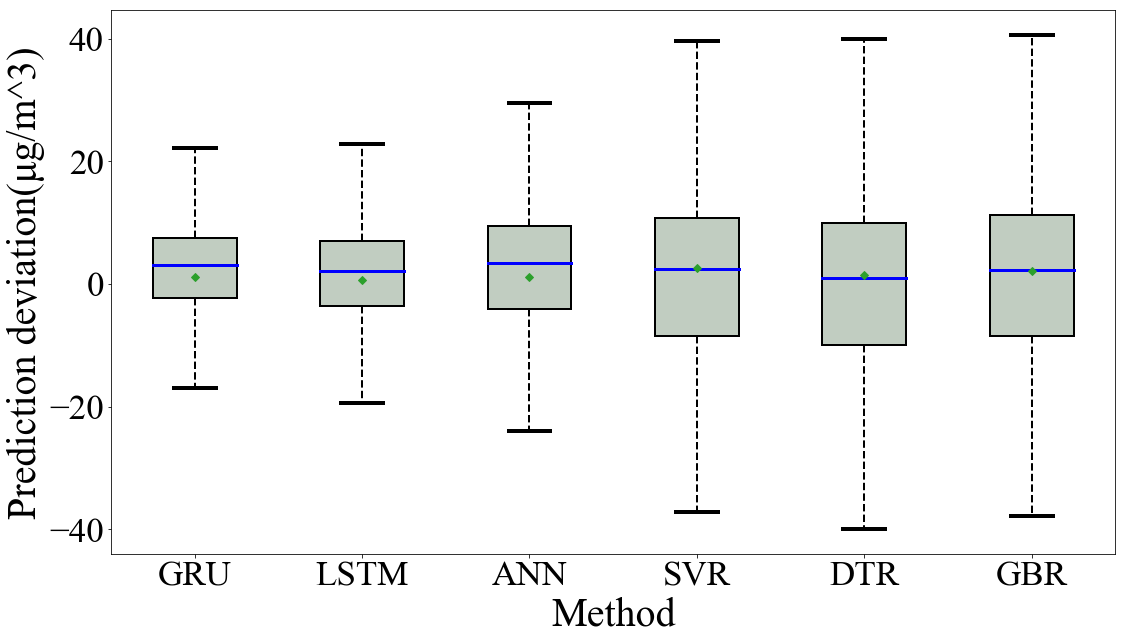

In [23]:
plt.figure(figsize=(18,10))
plt.boxplot(
    x=errordata,
    notch = False,#是否是凹口的形式展现箱型图
    patch_artist=True,#是否填充箱体的颜色
    
    labels=['GRU','LSTM','ANN','SVR','DTR','GBR'],
    
    meanline = False,
    showmeans = True,  # 是否有均值线及其形状 -用点表示均值 -显示均值
    showbox = True,   # 是否显示箱线
    showfliers = False,  #是否显示异常值


    boxprops={'color':'black','facecolor':'#C1CDC1','linewidth':2},
    flierprops={'marker':'+','markerfacecolor':'black','color':'black'},#设置异常点属性，点的形状，填充颜色和边框色
    meanprops={'marker':'D','linewidth':20},#均值属性   点的颜色和形状'markerfacecolor':'r','color':'m',
    capprops={'color':'k','linewidth':4},#设置箱线图顶端和末端线条的属性，如颜色，粗细等
    whiskerprops={"linestyle":'--','color':'k','linewidth':2},#设置须的属性，如颜色，粗细，线的类型
    medianprops={"linestyle":'-','color':'b','linewidth':3})   #中位数属性 线形和颜色       blue



# 设置图表标题并给坐标轴加上标签
#plt.title("CBGRU",fontsize=24)
plt.xlabel("Method",fontsize=40)
plt.ylabel("Prediction deviation(μg/m^3)",fontsize=40)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=35)
#plt.grid(True)  
plt.savefig('污染箱线图.pdf', bbox_inches='tight')
#plt.savefig('污染箱线图.eps',dpi=600,format='eps')
plt.show()

In [13]:
#plt.savefig('污染箱线图.svg',format='svg')
plt.savefig('污染箱线图.pdf', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

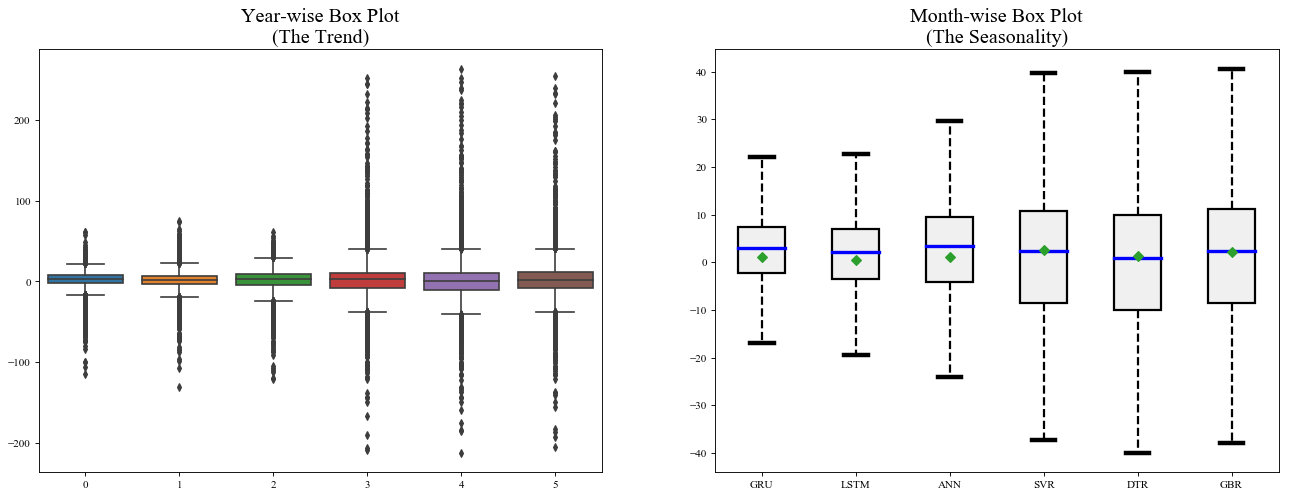

In [24]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})



# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#sns.boxplot( data=float_data_qian, ax=axes[0])
sns.boxplot( data=errordata, ax=axes[0])

plt.boxplot(
    x=errordata,
    notch = False,#是否是凹口的形式展现箱型图
    patch_artist=True,#是否填充箱体的颜色
    
    labels=['GRU','LSTM','ANN','SVR','DTR','GBR'],
    
    meanline = False,
    showmeans = True,  # 是否有均值线及其形状 -用点表示均值 -显示均值
    showbox = True,   # 是否显示箱线
    showfliers = False,  #是否显示异常值


    boxprops={'color':'black','facecolor':'#F0F0F0','linewidth':2},
    flierprops={'marker':'+','markerfacecolor':'black','color':'black'},#设置异常点属性，点的形状，填充颜色和边框色
    meanprops={'marker':'D','linewidth':20},#均值属性   点的颜色和形状'markerfacecolor':'r','color':'m',
    capprops={'color':'k','linewidth':4},#设置箱线图顶端和末端线条的属性，如颜色，粗细等
    whiskerprops={"linestyle":'--','color':'k','linewidth':2},#设置须的属性，如颜色，粗细，线的类型
    medianprops={"linestyle":'-','color':'b','linewidth':3})   #中位数属性 线形和颜色       blue



# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show